In [48]:
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
rma    = pd.read_csv("2023-06-26_heat3d_rma_ts10x10x10.csv")
nonrma = pd.read_csv("2023-06-26_heat3d_nonrma_ts10x10x10.csv")

In [50]:
def figure_for_time(attribute):
    maxy_rma    = max(rma[f"{attribute}-mean"])
    maxy_nonrma = max(nonrma[f"{attribute}-mean"])
    if maxy_rma > maxy_nonrma:
        maxy = maxy_rma
    else:
        maxy = maxy_nonrma
    
    plt.figure(figsize=[10,6])
    plt.plot(rma["n"],    rma[f"{attribute}-mean"],    "*-", label="rma")
    plt.plot(nonrma["n"], nonrma[f"{attribute}-mean"], "*-", label="nonrma")
    plt.title(f"rma versus non-rma heat3d implementations ({attribute.replace('_',' ')})")
    plt.legend()
    plt.xlabel("problem size (X=Y=Z")
    plt.ylabel("time (s)")
    plt.ylim(0,int(maxy+1))
    plt.show()

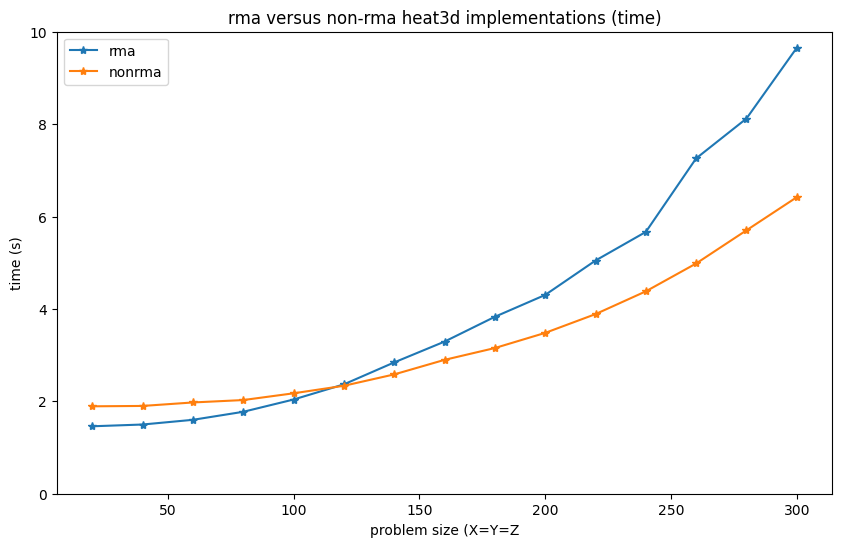

In [51]:
figure_for_time("time")

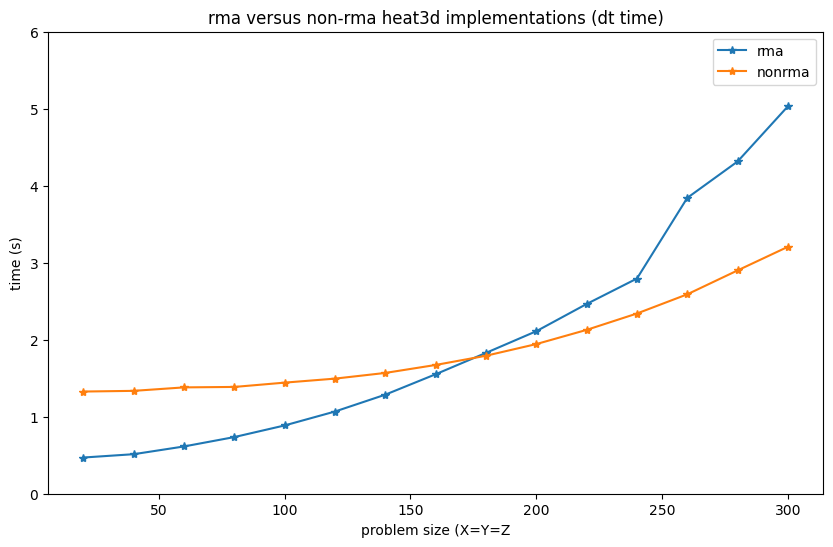

In [52]:
figure_for_time("dt_time")

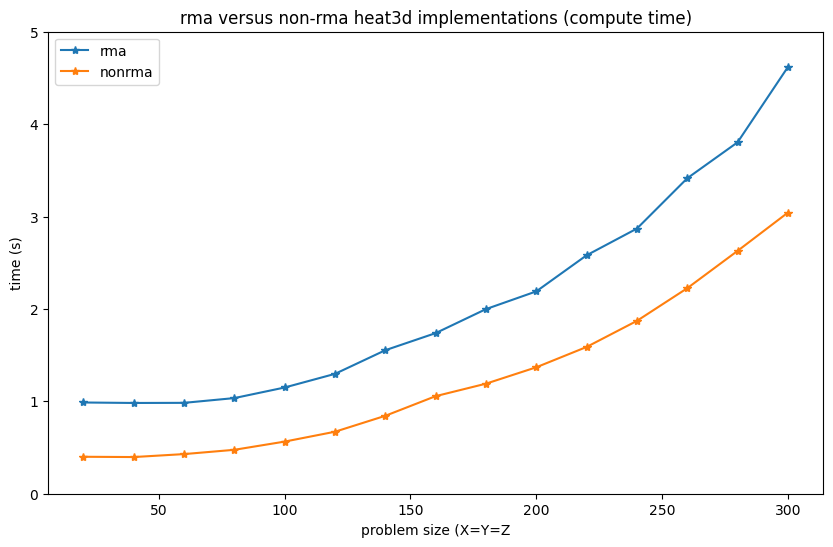

In [53]:
figure_for_time("compute_time")